<a href="https://colab.research.google.com/github/Khugoyal/TASK-1/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all the neccessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    

In [2]:
#read the data
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
#shows top 5 data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#provides information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#To check null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Hours VS Percentage')

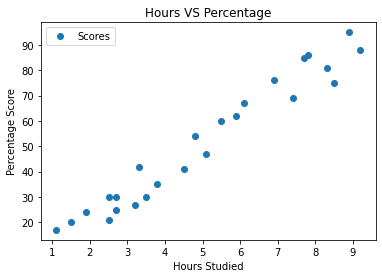

In [6]:
#Plotting the data in 2D to understand the distribution of data and relation between hours studied and scores
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours VS Percentage')

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
#selecting the values from dataframe
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [9]:
#splitting the data into Train and Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [10]:
#training data are trained using Linear Regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

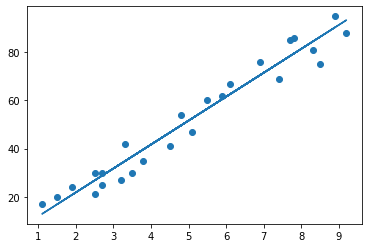

In [11]:
line = reg.coef_*x + reg.intercept_
plt.scatter(x,y)
plt.plot(x,line)

In [12]:
#using trained data we are predicting the students score using predict
pred=reg.predict(x_test)

In [13]:
new = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [14]:
# what will the student score , if he studies for any given amount of time can be calculated directly using predict function.
hours = 9.25
own_pred = round(reg.predict([[9.25]]) [0],2)
print("No of Hours = {}".format(hours)),
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = 93.89


In [15]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))

R^2: 0.9367661043365056
Mean Absolute Error: 4.130879918502482
